In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Load datasets
customers = pd.read_csv(r"C:\Users\sandr\Downloads\Customers.csv")
products = pd.read_csv(r"C:\Users\sandr\Downloads\Products.csv")
transactions = pd.read_csv(r"C:\Users\sandr\Downloads\Transactions.csv")

# Verify the data
print("Customers Data:")
print(customers.head())

print("\nProducts Data:")
print(products.head())

print("\nTransactions Data:")
print(transactions.head())


Customers Data:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Data:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions Data:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127 

In [5]:
print(customers.isnull().sum())


CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64


In [8]:
customers_df = customers.dropna()

In [9]:
print(products.isnull().sum())
print(transactions.isnull().sum())
products_df = products.dropna()
transactions_df = transactions.dropna()

ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [10]:
products_df['Price'] = products_df['Price'].fillna(products_df['Price'].median())

In [11]:
customers_df = customers_df.drop_duplicates()
products_df = products_df.drop_duplicates()
transactions_df = transactions_df.drop_duplicates()

In [12]:

unmatched_customers = transactions_df[~transactions_df['CustomerID'].isin(customers_df['CustomerID'])]
print(f"Unmatched CustomerIDs: {len(unmatched_customers)}")


unmatched_products = transactions_df[~transactions_df['ProductID'].isin(products_df['ProductID'])]
print(f"Unmatched ProductIDs: {len(unmatched_products)}")


Unmatched CustomerIDs: 0
Unmatched ProductIDs: 0


In [14]:
Q1 = transactions_df['TotalValue'].quantile(0.25)
Q3 = transactions_df['TotalValue'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

transactions_df = transactions_df[(transactions_df['TotalValue'] >= lower_bound) & 
                                   (transactions_df['TotalValue'] <= upper_bound)]

In [16]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
products_df['NormalizedPrice'] = scaler.fit_transform(products_df[['Price']])

In [17]:
customers_df.to_csv('cleaned_customers.csv', index=False)
products_df.to_csv('cleaned_products.csv', index=False)
transactions_df.to_csv('cleaned_transactions.csv', index=False)

In [18]:
merged_df = transactions_df.merge(customers_df, on='CustomerID', how='left')\
                           .merge(products_df, on='ProductID', how='left')


print(merged_df.info())
print(merged_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price_x          1000 non-null   float64
 7   CustomerName     1000 non-null   object 
 8   Region           1000 non-null   object 
 9   SignupDate       1000 non-null   object 
 10  ProductName      1000 non-null   object 
 11  Category         1000 non-null   object 
 12  Price_y          1000 non-null   float64
 13  NormalizedPrice  1000 non-null   float64
dtypes: float64(4), int64(1), object(9)
memory usage: 109.5+ KB
None
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001   

In [19]:
top_products = merged_df.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False)
print("Top 10 Products by Quantity Sold:")
print(top_products.head(10))

Top 10 Products by Quantity Sold:
ProductName
ActiveWear Smartwatch    100
SoundWave Headphones      97
HomeSense Desk Lamp       81
ActiveWear Rug            79
SoundWave Cookbook        78
ActiveWear Jacket         76
BookWorld Biography       71
TechPro T-Shirt           66
SoundWave Desk Lamp       64
TechPro Textbook          62
Name: Quantity, dtype: int64


In [20]:
category_sales = merged_df.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
print("Sales by Category:")
print(category_sales)

Sales by Category:
Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64


In [21]:
region_sales = merged_df.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
print("Sales by Region:")
print(region_sales)


Sales by Region:
Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


In [31]:

merged_df['TransactionDate'] = pd.to_datetime(merged_df['TransactionDate'], errors='coerce')
print(merged_df['TransactionDate'].isnull().sum())
merged_df['MonthYear'] = merged_df['TransactionDate'].dt.to_period('M')
monthly_sales = merged_df.groupby('MonthYear')['TotalValue'].sum()
print("Monthly Sales Trends:")
print(monthly_sales)



0
Monthly Sales Trends:
MonthYear
2023-12     3769.52
2024-01    66376.39
2024-02    51459.27
2024-03    47828.73
2024-04    57519.06
2024-05    64527.74
2024-06    48771.18
2024-07    71366.39
2024-08    63436.74
2024-09    70603.75
2024-10    47063.22
2024-11    38224.37
2024-12    59049.20
Freq: M, Name: TotalValue, dtype: float64


In [32]:

customer_spending = merged_df.groupby('CustomerID')['TotalValue'].sum()
print("Customer Spending Distribution:")
print(customer_spending.describe())


Customer Spending Distribution:
count      199.000000
mean      3467.314372
std       1832.677958
min         82.360000
25%       2162.040000
50%       3137.660000
75%       4770.225000
max      10673.870000
Name: TotalValue, dtype: float64


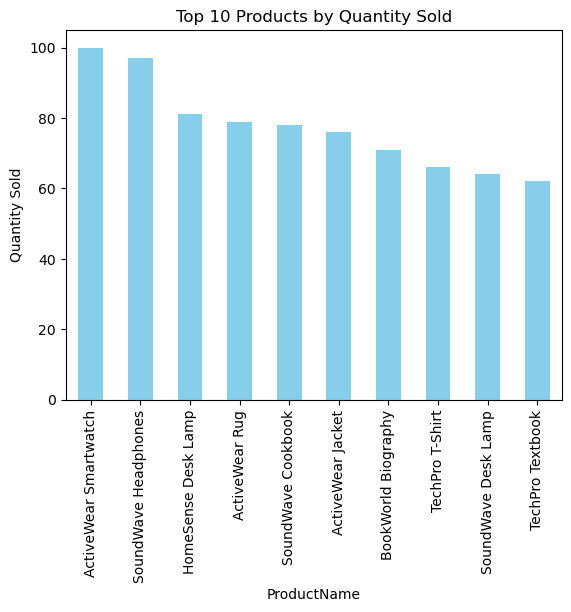

In [33]:
import matplotlib.pyplot as plt


top_products.head(10).plot(kind='bar', color='skyblue', title='Top 10 Products by Quantity Sold')
plt.ylabel('Quantity Sold')
plt.show()


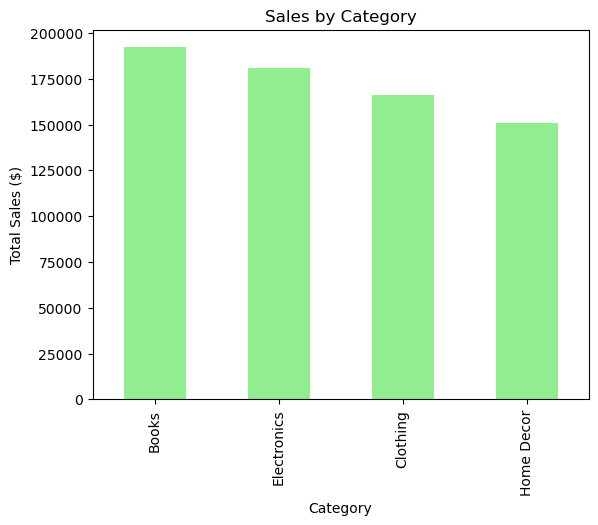

In [34]:

category_sales.plot(kind='bar', color='lightgreen', title='Sales by Category')
plt.ylabel('Total Sales ($)')
plt.show()


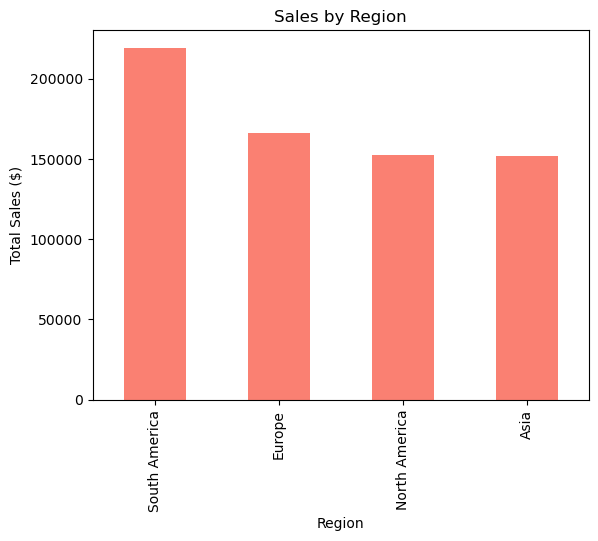

In [35]:

region_sales.plot(kind='bar', color='salmon', title='Sales by Region')
plt.ylabel('Total Sales ($)')
plt.show()


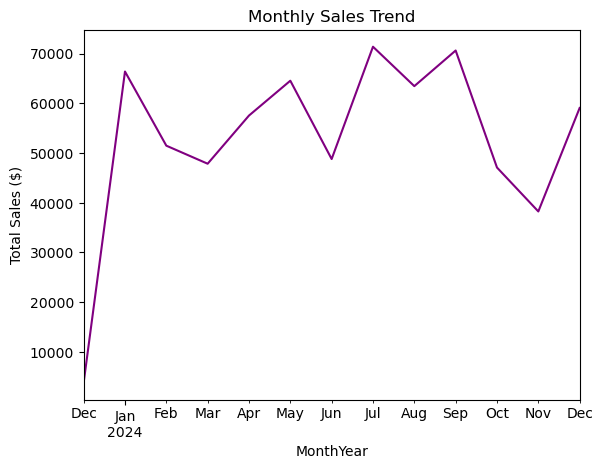

In [36]:

monthly_sales.plot(color='purple', title='Monthly Sales Trend')
plt.ylabel('Total Sales ($)')
plt.show()


C:\Users\sandr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


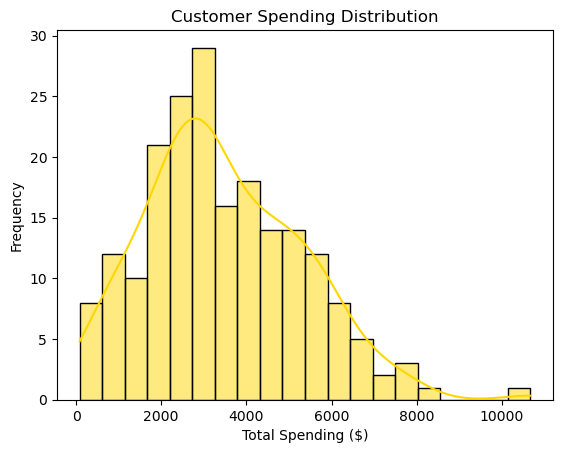

In [44]:

sns.histplot(customer_spending, bins=20, kde=True, color='gold')
plt.title('Customer Spending Distribution')
plt.xlabel('Total Spending ($)')
plt.ylabel('Frequency')
plt.show()


In [45]:
# Save cleaned and merged dataset
merged_df.to_csv('cleaned_merged_dataset.csv', index=False)
